In [1]:
import pandas as pd
import seaborn as sns

transactions = pd.read_csv("C:\\Users\\palej\\Desktop\\FIUBA\\Organizacion de datos\\TP\\transactions_train.csv")

In [2]:
def tipo_transferencia(numero) -> str:
    if numero == 0:
        return "Legal"
    else:
        return "Fraude"

In [39]:
analisis = transactions[["target", "feat_card_4", "ammount"]]

In [40]:
analisis = analisis.rename(columns={"target":"Fraude", "feat_card_4":"Tarjeta", "ammount":"Monto"})

In [41]:
analisis = analisis.fillna("Otra")

In [42]:
analisis["Transaccion"] = analisis["Fraude"].map(tipo_transferencia)

In [43]:
analisis = analisis.pivot_table(values="Monto", index="Tarjeta", columns="Transaccion", aggfunc=sum)

C:\Users\palej\AppData\Local\Temp\ipykernel_6980\2282215349.py:1: FutureWarning: The provided callable <built-in function sum> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  analisis = analisis.pivot_table(values="Monto", index="Tarjeta", columns="Transaccion", aggfunc=sum)


In [45]:
analisis.pop("Legal")

Tarjeta
Otra                1.542174e+05
american express    1.277980e+06
discover            1.322627e+06
mastercard          2.037503e+07
visa                4.184610e+07
Name: Legal, dtype: float64

Text(0.5, 1.0, 'Fraude en tarjetas')

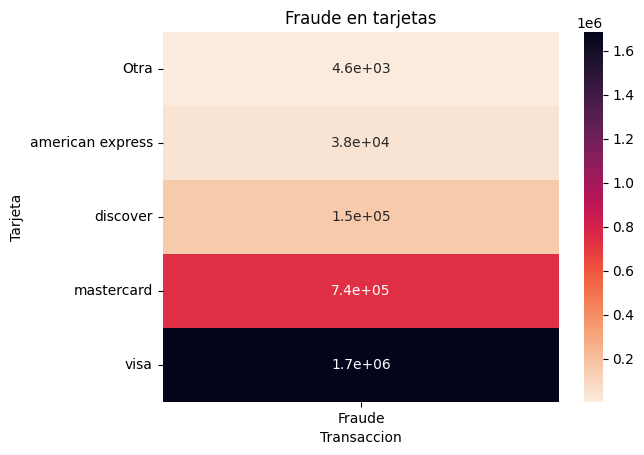

In [46]:
heatmap = sns.heatmap(analisis, annot=True, cmap=sns.color_palette("rocket_r", as_cmap=True))
heatmap.set_title("Fraude en tarjetas")